### PREDICTIVE MODELLING


- Regression Problems → Predict what is the value (number). 

- Classification Problems. → Predict what is the classification (class).

- Both are part of predictive modeling: the problem of developing a model using historical data to make a prediction on new data where we do not have the answer. 

- Predictive modeling can be described as the mathematical problem of approximating a mapping function (f) from input variables (X) to output variables (y). This is called the problem of function approximation. 

- The function that tries to approximate the mapping (or the relationship) between X and y is called a model (or a mathematical model).


                                                      
 #                                    f(X) = y


In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Data collected

- for each hour of travel we measure 

- the miles travelled so far.

- the fuel consumption 

- temperature of the environment.

- the altitude (height above the sea level)

In [2]:
hours = np.array([  0,  1,   2,   3,   4,   5,   6,   8,   10])

miles = np.array([  0, 41, 112, 157, 201, 258, 301, 410,  498])

fuel  = np.array([100, 91,  82,  71,  62,  51,  42,  31,   20])

temp  = np.array([ 22, 24,  28,  26,  25,  25,  24,  23,   21])

alt   = np.array([200, 256, 259, 302, 399, 381, 409, 489, 512])

### Testing and quantifying a linear relationship

- Visualization is always a great first step. 

#### Visualzing the relationship between miles and hours of travel.

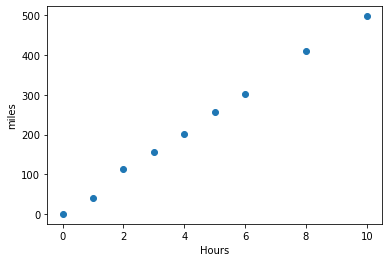

In [4]:
plt.scatter(hours, miles)
plt.xlabel("Hours")
plt.ylabel("miles")
plt.show()

#### Visualzing the relationship between miles travelled and fuel remaining.

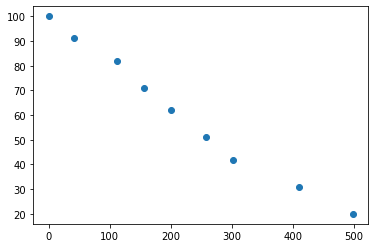

In [6]:
plt.scatter(miles, fuel)
plt.show()

#### Visualzing the relationship between miles travelled and temperature.

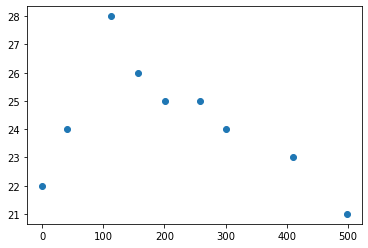

In [7]:
plt.scatter(miles, temp)
plt.show()

#### Visualizing the relatinship between the altitude and hours travelled

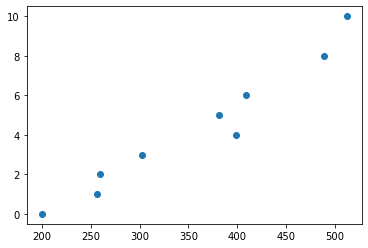

In [8]:
plt.scatter(alt, hours)
plt.show()

#### Quantifying a linear relationship
- The correlation value is a **quantitative measure** of how strong of a linear relationship there is between two variables in your data.

In [9]:
np.corrcoef(hours, miles)

array([[1.       , 0.9991967],
       [0.9991967, 1.       ]])

In [10]:
np.corrcoef(miles, fuel)

array([[ 1.        , -0.99218635],
       [-0.99218635,  1.        ]])

In [11]:
np.corrcoef(fuel, temp)

array([[1.        , 0.36743001],
       [0.36743001, 1.        ]])

In [12]:
np.corrcoef(hours, alt)

array([[1.        , 0.97440735],
       [0.97440735, 1.        ]])

### Things to consider before formulating the model. 

- There is a strong positive correlation between hours travelled and miles 


- There is a strong negative correlation between remaining fuel and miles travelled


- There is a weak (not statistically significant) correlation between the remaining fuel and temperature 


- There is a strong positive relationship between hours travelled and altitude! But.. what is the real relationship between them?? --> Correlation does not mean causation

### Build the linear regression model in Python using scikit-learn

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
model = LinearRegression()

In [15]:
hours = hours.reshape(-1, 1)
miles = miles.reshape(-1, 1)

In [16]:
model.fit(hours, miles)

LinearRegression()

### Let's perfom a first prediction. 
- Extrapolation 

In [17]:
hours_11 = np.array([11]).reshape(1, -1)
model.predict(hours_11)

array([[555.02325581]])

### Let's perform a second prediction 
- Interpolation

In [18]:
hours_9 = np.array([9]).reshape(1, -1)
model.predict(hours_9)

array([[454.4496124]])

# How does the model work from a mathematical point of view? 

## y = f(X)

## y = m*x + b 

## Let's check the coeficient and the intercept of the model. 

In [19]:
model.coef_

array([[50.28682171]])

In [20]:
model.intercept_

array([1.86821705])

In [21]:
m = model.coef_
b = model.intercept_

y = m*9 + b
y

array([[454.4496124]])

In [22]:
y = m*11 +b
y

array([[555.02325581]])

### Interesting questions to ask? 

- What does it mean to fit a model to data? 

- From a machine learning perspective, how do I get the best fit? 

- How do I compute the forecasting error? 

- 